In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import imshow

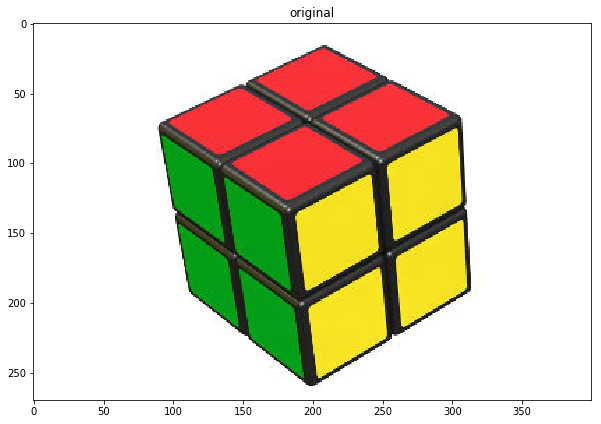

In [65]:
filename = '2x2_cube.jpg'
img = cv2.imread(filename)
imshow('original', img)

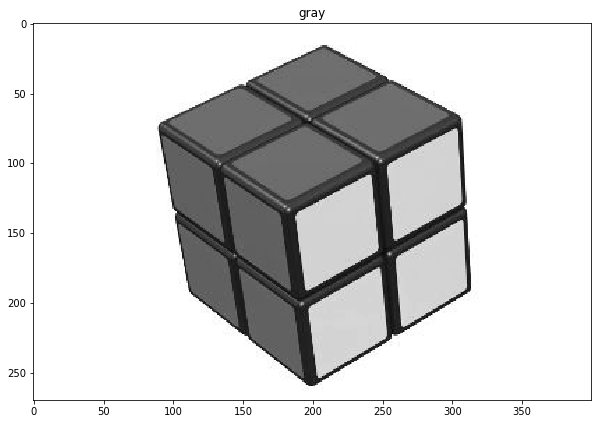

In [66]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow('gray', gray, gray=True)
gray = np.float32(gray)

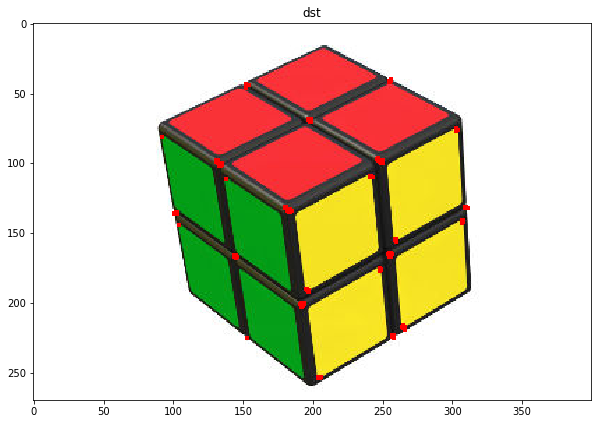

In [67]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#dialation. What is this
dst = cv2.dilate(dst, None)

new_img = img.copy()
new_img[dst>0.01*dst.max()] = [0,0,255]

imshow('dst', new_img)

In [68]:
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)


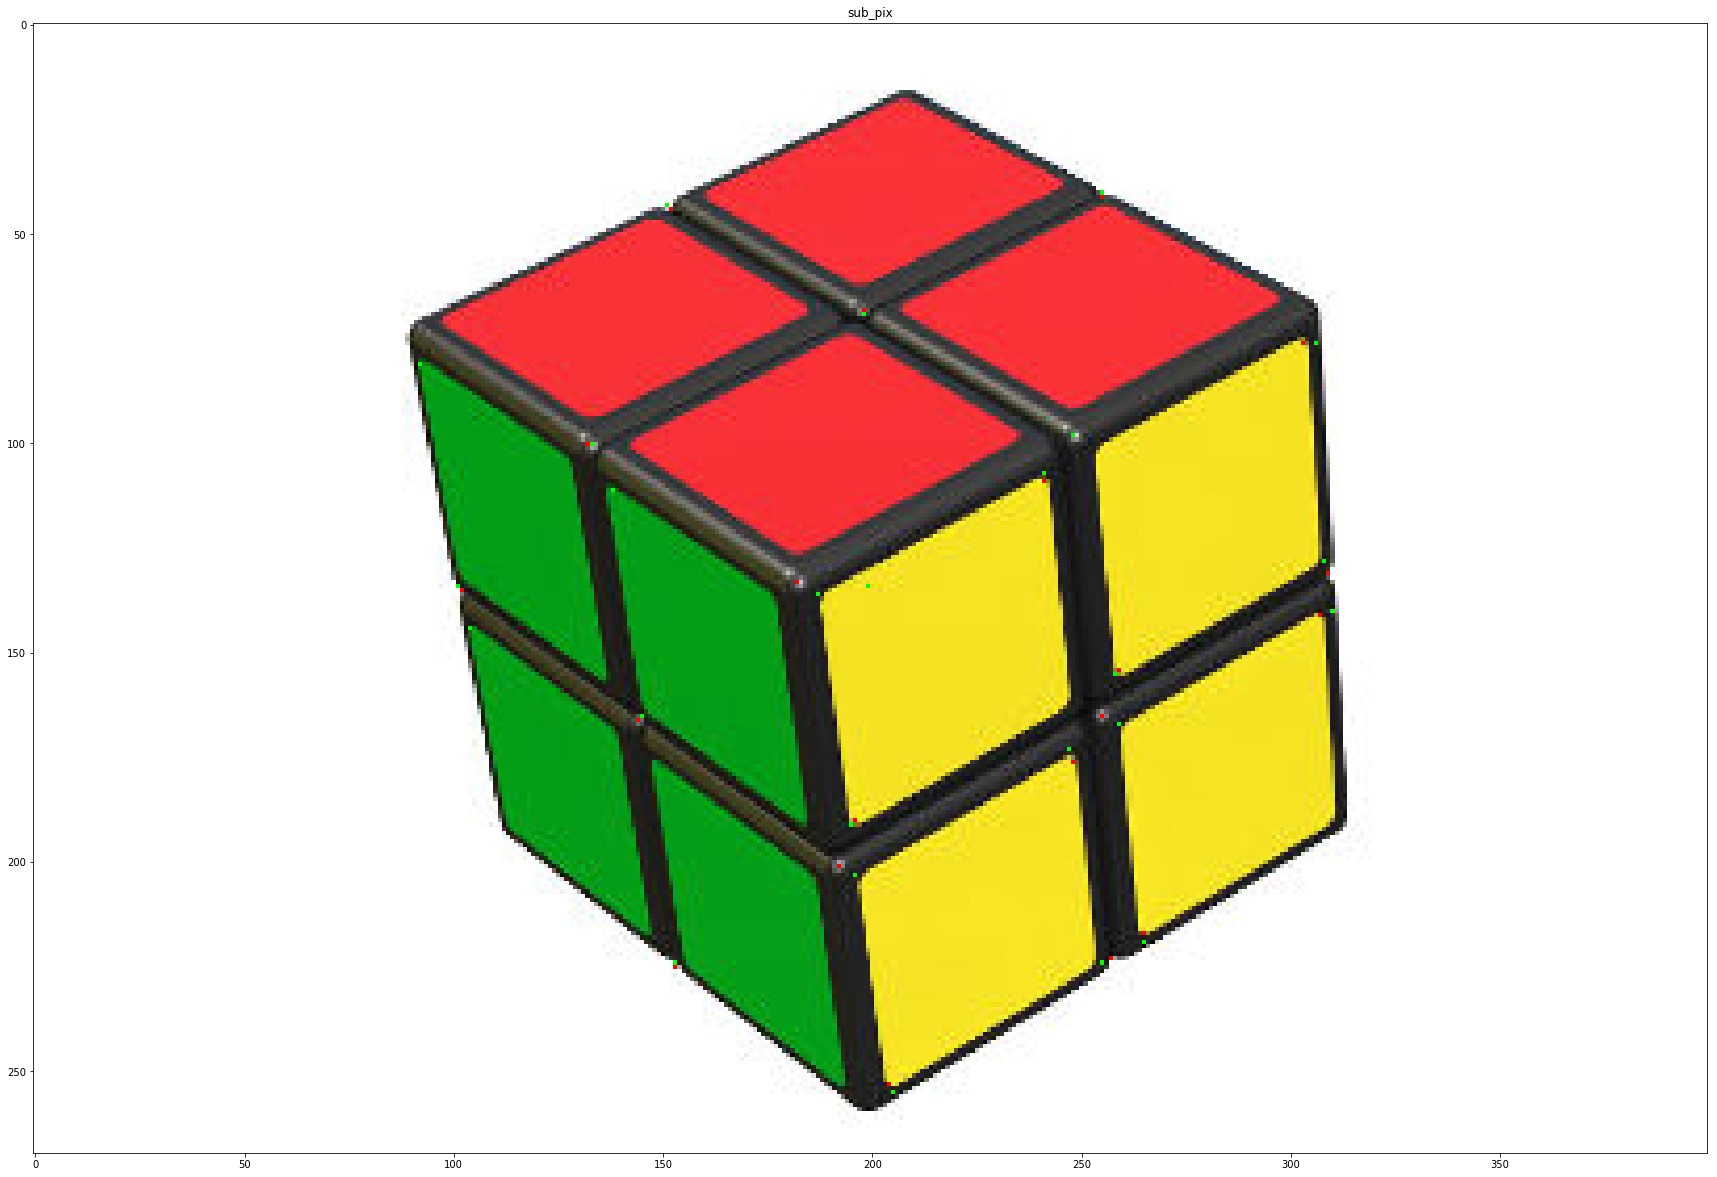

In [69]:

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
new_img = img.copy()
new_img[res[:,1],res[:,0]]=[0,0,255]
new_img[res[:,3],res[:,2]] = [0,255,0]
imshow('sub_pix', new_img, size=30)


In [70]:
a = np.array([[1,2,3]  
             ,[4,5,6]])
b = np.array([[7,8,9]
             ,[10,11,12]])
np.vstack((a,b))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])